In [392]:
import numpy as np
import pandas as pd
import os
import seaborn as sb
data_dir = '/Users/Yoyo/Desktop/Graduation/ML_test/dataset/Moore'
entry = 'moore_results.csv'
full_index = np.array([0, 59, 94, 95, 84, 161, 44, 179, 82, 112, 58, 248])
classes = ['WWW', 'MAIL', 'FTP-CONTROL', 'FTP-PASV', 'ATTACK', 'P2P', 'DATABASE', 'FTP-DATA', 'MULTIMEDIA', 'SERVICES',
           'INTERACTIVE', 'GAMES']
after_classes = ['WWW', 'MAIL', 'FTP-CONTROL', 'FTP-PASV', 'P2P', 'DATABASE', 'FTP-DATA', 'SERVICES',
           'INTERACTIVE']
after_file = os.path.join(data_dir, entry)
names = [x for x in range(249)]

file = os.path.join(data_dir, entry)

df = pd.read_csv(file)

df.head()

,clf,time_raw_0,time_resample_0,time_raw_s,time_resample_s,score_raw_0,score_raw_s,score_resample_0,score_resample_s,score_after_s,score_of_s
0,knn,60.80,96.25,31.39,55.35,0.994,0.982,0.935,0.976,0.619,0.837
1,lgb,11.97,26.36,16.87,31.75,0.993,0.992,0.956,0.969,0.873,0.951
2,nb,1.31,2.14,12.10,20.30,0.091,0.938,0.236,0.518,0.236,0.594
3,nn,115.32,161.09,73.19,99.43,0.978,0.873,0.895,0.898,0.716,0.701
4,svm,49.84,77.13,294.71,540.55,0.994,0.647,0.912,0.579,0.237,0.535


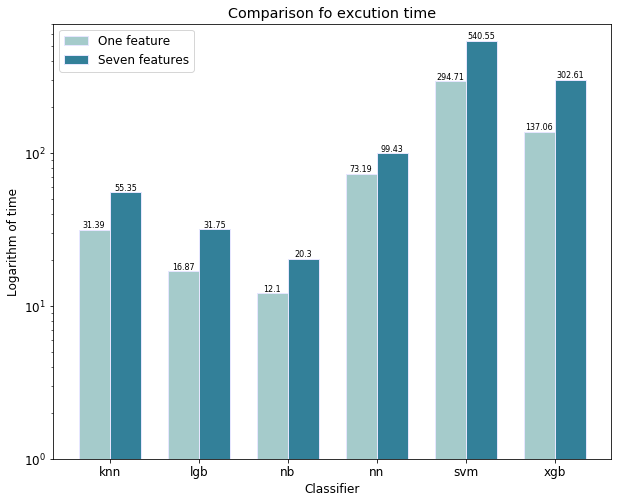

In [400]:
clf_names = df['clf'].values

value_names = df.columns[1:]

values = []
for i in range(len(df.columns)):
    value = df[df.columns[i]].values
    values.append(value)

import matplotlib.pyplot as plt
import matplotlib as mpl
# for i in range(1,len(value_names)+1):
#     plt.figure(i)
#     values = df[df.columns[i]].values
#     plt.barh(clf_names, values)
fig = plt.figure(figsize=(10,8))
index = np.arange(len(clf_names))
width = .35
plt.ylim((1,700))
rects1 = plt.bar(index,values[3], align='center',width=width,
       color=(.3,.6,.6,.5),edgecolor='w',linewidth=1,log=True,label='One feature')
rects2 = plt.bar(index+width,values[4], align='center',width=width,
       color=(.2,.5,.6,1),edgecolor='w',linewidth=1,log=True,label='Seven features')
plt.xticks(index+width/2,clf_names)
def set_values(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom',fontsize=8)
        rect.set_edgecolor((.9,.9,1))
set_values(rects1)
set_values(rects2)
plt.legend(loc='best')
plt.xlabel('Classifier')
plt.ylabel('Logarithm of time')
plt.title('Comparison fo excution time')
# fig.savefig(os.path.join(data_dir,'time_comp.png'))